El perceptron fue inventado por Frank Rosenblatt en 1957. Es un algoritmo de aprendizaje supervisado de clasificación binaria. Es un modelo de red neuronal de una sola capa.

La formula del perceptrón es:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$
donde:
- $x_i$ son las entradas.
- $w_i$ son los pesos.
- $b$ es el sesgo (bias).
- $f$ es la función de activación.
- $y$ es la salida del perceptrón.

La función de activación es la función escalón de Heaviside:

$$
f(x) = \left\{
\begin{array}{ll}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0 
\end{array}
\right.
$$

El perceptrón se entrena ajustando los pesos y el sesgo de la siguiente manera:
$$
w_i := w_i + \eta (y - \hat{y}) x_i  \\
b := b + \eta (y - \hat{y}) \\
$$

donde:
- $\eta$ es la tasa de aprendizaje.
- $y$ es la salida esperada.
- $\hat{y}$ es la salida predicha.
- $x_i$ es la entrada correspondiente al peso $w_i$.

<img src="Perceptrón.png" alt="Perceptrón" width="800px">


In [1]:
# Instalo las librerías necesarias
# Sacar el comentario de la siguiente línea si no se tienen instaladas las librerías

# !pip install numpy pandas matplotlib seaborn

# Importo las librerías necesarias
import numpy as np              # type: ignore
import pandas as pd             # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns           # type: ignore
import random


## Implementación de un perceptrón simple 
copiamos estrictamente la fórmula del perceptrón en python puro

In [2]:

def perceptron(x, w, b):
    return sum([x * w for x,w in zip(x,w)]) + b

def activacion(z):
    return 0 if z <= 0 else 1

def ajustar(X, y):
    w = [random.random() for _ in X[0]]
    b = random.random()

    aprendizaje = 0.001
    for _ in range(100):
        for i in range(len(X)):
            x = X[i]
            y_pred = activacion(perceptron(x, w, b))
            
            error = y[i] - y_pred

            w = [w[i] + aprendizaje * error * x[i] for i in range(len(x))]
            b = b + error
    return w, b

## Caso de uso... 

# Aprender la compuerta lógica AND 

# Compuerta lógica X1, X2
X = [[0,0], 
     [0,1], 
     [1,0], 
     [1,1]]

y0 = [0, 0, 0, 1]

w, b = ajustar(X, y0)
print(w, b)
for x in X:
    print(x, activacion(perceptron(x, w, b)))

[0.9646533867952826, 0.589749086046622] -0.8027497626319713
[0, 0] 0
[0, 1] 0
[1, 0] 1
[1, 1] 1


## Implementación con numpy
Usamos numpy para hacer el código más eficiente 

In [3]:

def perceptron(x, w, b):
    return np.dot(x, w) + b

def activacion(z):
    return 0 if z <= 0 else 1

def ajustar(X, y):
    X = np.array(X)
    y = np.array(y)
    
    w = np.random.rand(X.shape[1])
    b = random.random()

    aprendizaje = 0.001
    for _ in range(100):
        # Ajusta los parámetros para cada muestra en forma individual
        for i in range(len(X)):
            x = X[i]
            y_pred = activacion(perceptron(x, w, b))
            
            error = y[i] - y_pred

            w += aprendizaje * error * x
            b += error
    return w, b

# Compuerta lógica X1, X2
X = [[0,0], 
     [0,1], 
     [1,0], 
     [1,1]]

y0 = [0, 0, 0, 1] # AND

w, b = ajustar(X, y0)
print(w, b)
for x in X:
    print(x, activacion(perceptron(x, w, b)))

[0.86360108 0.14015786] -0.5085946313665435
[0, 0] 0
[0, 1] 0
[1, 0] 1
[1, 1] 1


## Implementación con numpy y orientada a objetos
Creamos una clase Perceptron para encapsular el código y hacerlo más reutilizable

In [10]:

class Perceptron:
    def __init__(self, aprendizaje=0.001, epocas=1000):
        self.aprendizaje = aprendizaje
        self.epocas = epocas
        self.w = None
        self.b = None   
        self.errores = []

    def perceptron(self, x):
        return np.dot(x, self.w) + self.b

    def activacion(self, z): # Escalón unitario
        return 0 if z <= 0 else 1

    def error(self, y, y_pred):
        return ((y - y_pred)**2).mean()
    
    def ajustar(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.w = np.random.rand(X.shape[1])
        self.b = random.random()

        for _ in range(self.epocas):
            # Ajustamos los parámetros de todas las muestras en forma simultánea

            # Forward propagation - Propagación hacia adelante
            y_pred = np.array([self.predecir(x) for x in X])
            error  = y - y_pred

            # Backpropagation - Retropropagación 
            self.w += self.aprendizaje * np.dot(error, X)
            self.b += self.aprendizaje * error.sum()

            self.errores.append(self.error(y, y_pred))
        return self 

    def predecir(self, x):
        return self.activacion(self.perceptron(x))

# Compuerta lógica X1, X2 
X = [[0,0], 
     [0,1], 
     [1,0], 
     [1,1]]

y = [0, 0, 0, 1] # AND

p = Perceptron(0.001, 1000)
p.ajustar(X, y)

print(f"Parámetros w: {p.w.round(2)}, b: {p.b:.2f}")

# Mostramos los resultados
print(' x1 x2 y~ y')
for x,y in zip(X,y):
    print(x, p.predecir(x), y)

def f(x):
    return p.predecir(x)

Parámetros w: [0.04 0.  ], b: -0.04
 x1 x2 y~ y
[0, 0] 0 0
[0, 1] 0 0
[1, 0] 0 0
[1, 1] 1 1


## Implementación de otros tipos de perceptrones

Parametros w: 1.80, b: 32.00
Entrada:     0, Predicción:   32, Real:   32
Entrada:    37, Predicción:   99, Real:   99
Entrada:   100, Predicción:  212, Real:  212
Entrada:    50, Predicción:  122, Real:  122


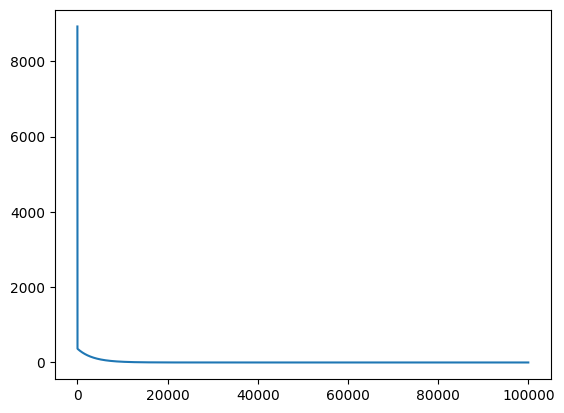

In [6]:

class Regresion(Perceptron):
    def activacion(self, z): # Identidad lineal
        return z

class RegresionLogistica(Perceptron):
    def activacion(self, z): # Sigmoide
        return 1 / (1 + np.exp(-z))

class ReLU(Perceptron):
    def activacion(self, z): # ReLU (Rectified Linear Unit)
        return np.maximum(0, z)

## Caso de uso.

# Calcular la temperatura en grados Farenheit
def celcius_to_farenheit(c): # Formula original (w=1.8, b=32)
    return c * 1.8 + 32

# Datos de la muestra
X = [[0], [37], [100], [50]]
y = [32 , 98.6, 212, 122]

r = Regresion(0.0001, 100000).ajustar(X, y)
print(f"Parametros w: {r.w[0]:.2f}, b: {r.b:.2f}")

plt.plot(r.errores)
for x,y in zip(X,y):
    print(f"Entrada: {x[0]:5}, Predicción: {r.predecir(x):4.0f}, Real: {y:4.0f}")
plt.show()

## Usamos el Perceptrón para clasificar 'flores iris'



Para la muestra 10 con las características [5.4 3.7 1.5 0.2] es Iris-setosa
 Iris Setosa     1 1
 Iris Vericolor  0 0
 Iris Virginica  0 0

Para la muestra 40 con las características [5.  3.5 1.3 0.3] es Iris-setosa
 Iris Setosa     1 1
 Iris Vericolor  0 0
 Iris Virginica  0 0

Para la muestra 60 con las características [5.  2.  3.5 1. ] es Iris-versicolor
 Iris Setosa     0 0
 Iris Vericolor  1 1
 Iris Virginica  0 0

Para la muestra 80 con las características [5.5 2.4 3.8 1.1] es Iris-versicolor
 Iris Setosa     0 0
 Iris Vericolor  1 1
 Iris Virginica  0 0

Para la muestra 130 con las características [7.4 2.8 6.1 1.9] es Iris-virginica
 Iris Setosa     0 0
 Iris Vericolor  1 0
 Iris Virginica  1 1


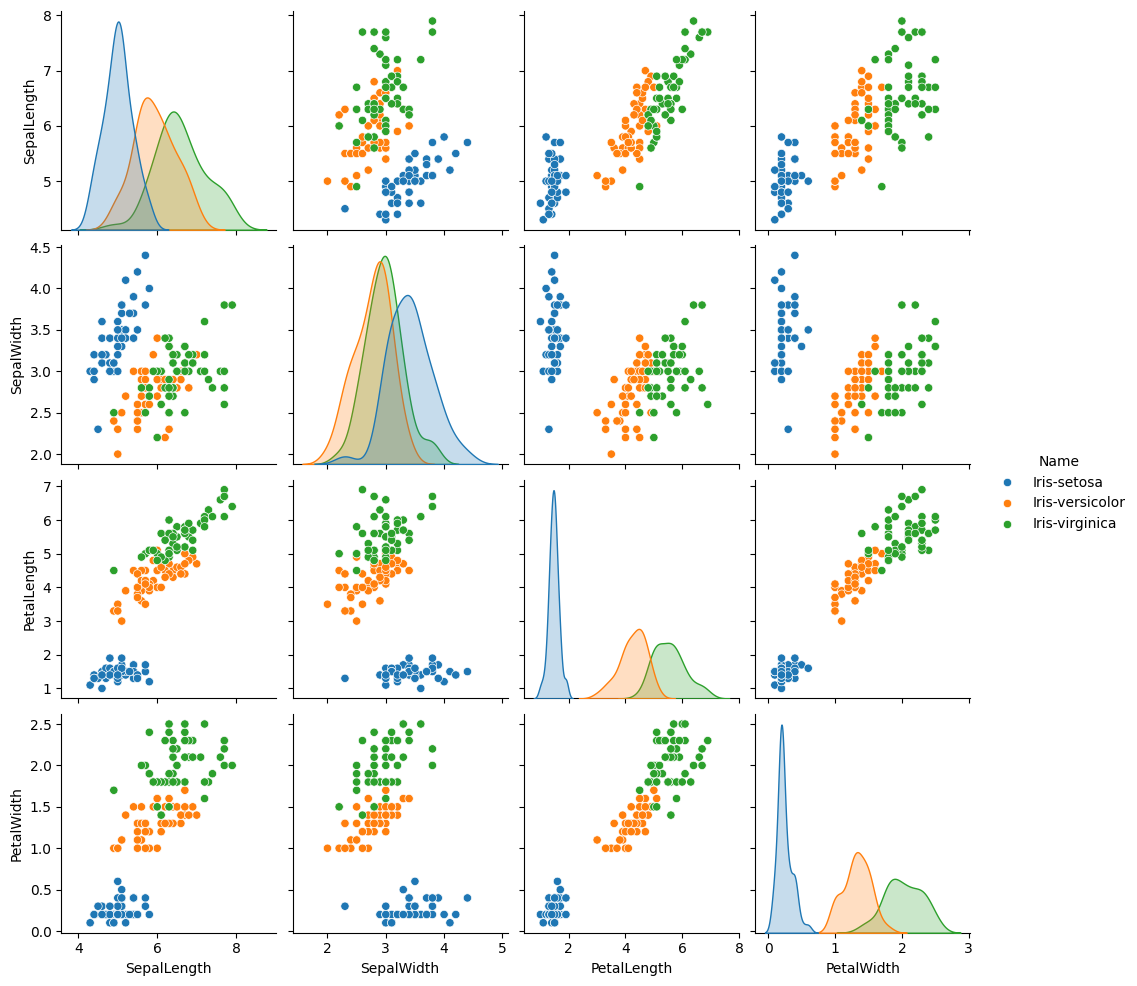

In [7]:

# Leer los datos de iris
datos = pd.read_csv('./iris.csv')

# Extraer las características y las etiquetas
X  = datos[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values

# Tomamos las etiquetas de las flores
y = datos['Name'].values
# Convertir las etiquetas a valores binarios

y0 = np.where(y == 'Iris-setosa',     1, 0) # ys = Iris-setosa
y1 = np.where(y == 'Iris-versicolor', 1, 0) # ys = Iris-versicolor
y2 = np.where(y == 'Iris-virginica',  1, 0) # ys = Iris-virginica

# Usamos 2 perceptrones para clasificar dos tipos de flores

p0 = Perceptron(0.0001, 1000)
p0.ajustar(X, y0)

p1 = Perceptron(0.0001, 1000)
p1.ajustar(X, y1)

p2 = Perceptron(0.0001, 1000)
p2.ajustar(X, y2)

# Comprobamos los resultados estimando la clasificación y revisando que sea la misma que la real

for n in [10, 40, 60, 80, 130]:
    print(f"\nPara la muestra {n} con las características {X[n]} es {y[n]}")
    print(' Iris Setosa    ', p0.predecir(X[n]), y0[n])
    print(' Iris Vericolor ', p1.predecir(X[n]), y1[n])
    print(' Iris Virginica ', p2.predecir(X[n]), y2[n])

# Mostrar la correlación entre las variables en forma gráfica
sns.pairplot(datos, hue='Name')
plt.show()
